In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import music21

from fractions import Fraction
from collections import defaultdict, Counter
# from iteration_utilities import deepflatten #flatten nested lists

from music21 import midi, note, stream, instrument, meter, key
import itertools
import random

import string
import matplotlib.pyplot as plt

# Task C

In [111]:
file_path = '/content/drive/MyDrive/musicology a3/MunA10M.mid'

## pitches pattern

In [108]:
import sys
sys.path.append('/content/drive/MyDrive/musicology a3/midi_score.mid')
from task_c3 import extract_pitches_and_intervals, get_filtered_patterns, merge_and_filter_patterns, quantize_data

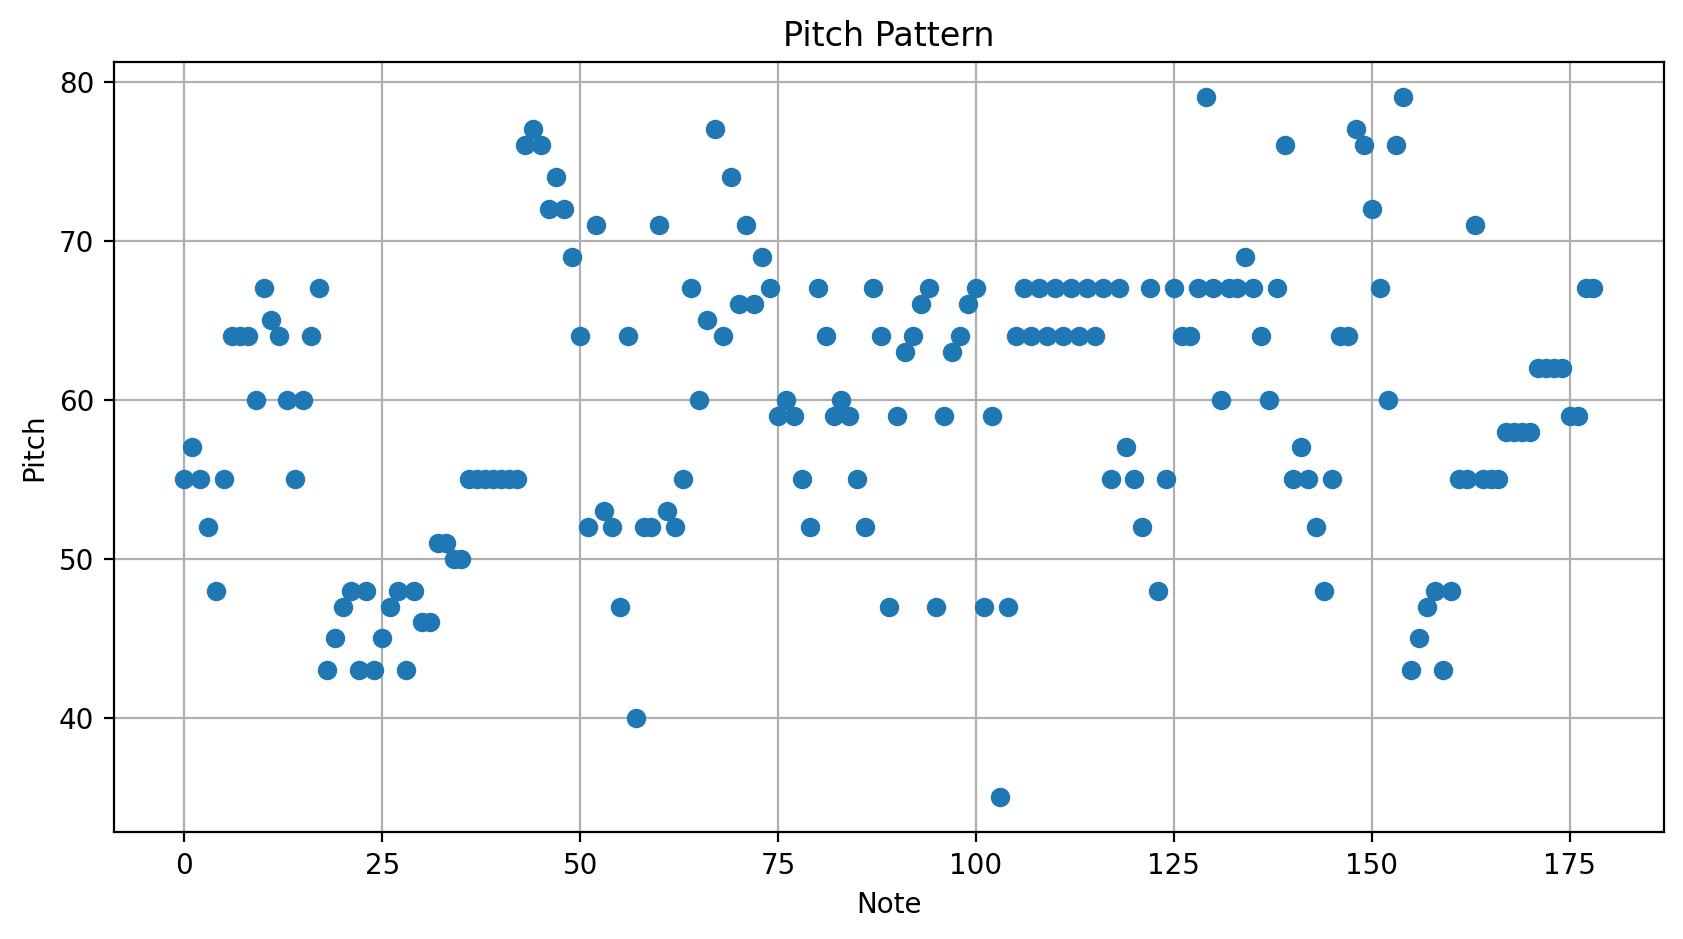

In [129]:
pattern =(55, 57, 55, 52, 48, 55, 64, 64, 64, 60, 67, 65, 64, 60, 55, 60, 64, 67, 43, 45, 47, 48, 43, 48, 43, 45, 47, 48, 43, 48, 46, 46, 51, 51, 50, 50, 55, 55, 55, 55, 55, 55, 55, 76, 77, 76, 72, 74, 72, 69, 64, 52, 71, 53, 52, 47, 64, 40, 52, 52, 71, 53, 52, 55, 67, 60, 65, 77, 64, 74, 66, 71, 66, 69, 67, 59, 60, 59, 55, 52, 67, 64, 59, 60, 59, 55, 52, 67, 64, 47, 59, 63, 64, 66, 67, 47, 59, 63, 64, 66, 67, 47, 59, 35, 47, 64, 67, 64, 67, 64, 67, 64, 67, 64, 67, 64, 67, 55, 67, 57, 55, 52, 67, 48, 55, 67, 64, 64, 67, 79, 67, 60, 67, 67, 69, 67, 64, 60, 67, 76, 55, 57, 55, 52, 48, 55, 64, 64, 77, 76, 72, 67, 60, 76, 79, 43, 45, 47, 48, 43, 48, 55, 55, 71, 55, 55, 55, 58, 58, 58, 58, 62, 62, 62, 62, 59, 59, 67, 67)

plt.figure(figsize=(10, 5))
plt.plot(pattern, 'o', label='Pattern ' + '-'.join(map(str, pattern)))

plt.xlabel('Note')
plt.ylabel('Pitch')
plt.title('Pitch Pattern')
plt.grid(True)
plt.show()

## Pitches intervals pattern

In [ ]:
filtered_patterns_forward_intervals = get_filtered_patterns(intervals, direction='forward')
filtered_patterns_backward_intervals = get_filtered_patterns(intervals, direction='backward')

print("Filtered forward expansion patterns:")
for pattern, count in filtered_patterns_forward_intervals.items():
    print(f'Pattern {pattern} occurs {count} times.')

print("Filtered backward expansion patterns:")
for pattern, count in filtered_patterns_backward_intervals.items():
    print(f'Pattern {pattern} occurs {count} times.')

Checking forward patterns of length 8:
Pattern (-4, -5, -19, 10, 2, 16, -4, -5) occurs 2 times.
Pattern (-5, -19, 10, 2, 16, -4, -5, -19) occurs 2 times.
Pattern (10, 2, 22, -34, 28, -6, -10, -5) occurs 2 times.
Pattern (0, -7, 16, 8, 4, -28, 16, 8) occurs 2 times.
Pattern (-4, 9, -16, 12, -5, 12, -12, 8) occurs 2 times.
Pattern (-34, 33, -4, -24, 7, 9, 12, 1) occurs 2 times.
Pattern (33, -4, -24, 7, 9, 12, 1, -1) occurs 2 times.
Pattern (-12, 13, -12, 7, -12, 9, -12, 27) occurs 3 times.
Pattern (13, -12, 7, -12, 9, -12, 27, -12) occurs 3 times.
Pattern (-12, 7, -12, 9, -12, 27, -12, 9) occurs 2 times.
Pattern (7, -12, 9, -12, 27, -12, 9, -12) occurs 2 times.
Pattern (-12, 9, -12, 27, -12, 9, -12, 7) occurs 2 times.
Pattern (9, -12, 27, -12, 9, -12, 7, -12) occurs 2 times.
Pattern (-12, 22, -18, 16, -15, 14, -12, 10) occurs 4 times.
Pattern (22, -18, 16, -15, 14, -12, 10, -9) occurs 4 times.
Pattern (-9, 16, -36, 28, 3, -7, -12, 22) occurs 2 times.
Pattern (16, -36, 28, 3, -7, -12, 22,

In [ ]:
final_patterns_intervals = merge_and_filter_patterns(filtered_patterns_forward_intervals, filtered_patterns_backward_intervals)

print("Final filtered patterns:")
for pattern, count in final_patterns_intervals.items():
    print(f'Pattern {pattern} occurs {count} times.')

Final filtered patterns:
Pattern (10, 2, 22, -34, 28, -6, -10, -5) occurs 2 times.
Pattern (0, -7, 16, 8, 4, -28, 16, 8) occurs 2 times.
Pattern (-4, 9, -16, 12, -5, 12, -12, 8) occurs 2 times.
Pattern (-4, -5, -19, 10, 2, 16, -4, -5, -19) occurs 2 times.
Pattern (-34, 33, -4, -24, 7, 9, 12, 1, -1) occurs 2 times.
Pattern (-12, 9, -12, 27, -12, 9, -12, 7, -12) occurs 2 times.
Pattern (-12, -5, -7, 4, 20, -12, -5, -7, 4) occurs 2 times.
Pattern (-12, 13, -12, 7, -12, 9, -12, 27, -12, 9, -12) occurs 2 times.
Pattern (-9, 16, -36, 28, 3, -7, -12, 22, -18, 16, -15, 14, -12, 10, -9, -20, 36) occurs 2 times.


## Onset notes pattern

In [ ]:
from music21 import converter, note, chord
from collections import defaultdict

In [134]:
# Example usage
file_path = '/content/drive/MyDrive/musicology a3/midi_score.mid'
onset_pitch_dict = extract_onset_pitch_dict(file_path)

print("Onset-Pitch Dictionary:", onset_pitch_dict)

Onset-Pitch Dictionary: {0.0: 55, 0.75: 57, 1.0: 55, Fraction(4, 3): 52, Fraction(5, 3): 48, 2.0: 55, 2.75: 64, 3.0: 64, 4.0: 64, 5.0: 60, 6.0: 67, 6.75: 65, 7.0: 64, Fraction(22, 3): 60, Fraction(23, 3): 55, 8.0: 60, Fraction(25, 3): 64, Fraction(26, 3): 67, 9.0: 43, 9.5: 45, 9.75: 47, 10.0: 48, 10.5: 43, 11.0: 48, 12.0: 43, 12.5: 45, 12.75: 47, 13.0: 48, 13.5: 43, 14.0: 48, 14.5: 46, 15.0: 46, 15.5: 51, 16.0: 51, 16.5: 50, 17.0: 50, 17.5: 55, 18.0: 55, 18.5: 55, 19.0: 55, 20.0: 55, 20.5: 55, 21.0: 55, 24.0: 55, 24.75: 57, 25.0: 55, Fraction(76, 3): 52, Fraction(77, 3): 48, 26.0: 55, 26.75: 64, 27.0: 64, 28.0: 64, 29.0: 60, 30.0: 67, 30.75: 65, 31.0: 64, Fraction(94, 3): 60, Fraction(95, 3): 55, 32.0: 60, Fraction(97, 3): 64, Fraction(98, 3): 67, 33.0: 43, 33.5: 45, 33.75: 47, 34.0: 48, 34.5: 43, 35.0: 48, 36.0: 43, 36.5: 45, 36.75: 47, 37.0: 48, 37.5: 43, 38.0: 48, 38.5: 46, 39.0: 46, 39.5: 51, 40.0: 51, 40.5: 50, 41.0: 50, 41.5: 55, 42.0: 55, 42.5: 55, 43.0: 55, 44.0: 55, 44.5: 55, 

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [136]:
onset_duration_dict = extract_onset_duration_dict(file_path)

print("Onset-Pitch-Duration Dictionary:", onset_duration_dict)

Onset-Pitch-Duration Dictionary: {0.0: 1.0, 0.75: 0.25, 1.0: Fraction(1, 3), Fraction(4, 3): Fraction(1, 3), Fraction(5, 3): Fraction(1, 3), 2.0: 0.75, 2.75: 0.25, 3.0: 2.0, 4.0: 1.0, 5.0: 0.5, 6.0: 1.0, 6.75: 0.25, 7.0: Fraction(1, 3), Fraction(22, 3): Fraction(1, 3), Fraction(23, 3): Fraction(1, 3), 8.0: Fraction(1, 3), Fraction(25, 3): Fraction(1, 3), Fraction(26, 3): Fraction(1, 3), 9.0: 0.25, 9.5: 0.25, 9.75: 0.25, 10.0: 0.25, 10.5: 0.25, 11.0: 0.25, 12.0: 0.25, 12.5: 0.25, 12.75: 0.25, 13.0: 0.25, 13.5: 0.25, 14.0: 0.25, 14.5: 0.25, 15.0: 0.25, 15.5: 0.25, 16.0: 0.25, 16.5: 0.25, 17.0: 0.25, 17.5: 0.25, 18.0: 0.25, 18.5: 0.25, 19.0: 1.5, 20.0: 0.5, 20.5: 0.5, 21.0: 3.0, 24.0: 1.0, 24.75: 0.25, 25.0: Fraction(1, 3), Fraction(76, 3): Fraction(1, 3), Fraction(77, 3): Fraction(1, 3), 26.0: 0.75, 26.75: 0.25, 27.0: 2.0, 28.0: 1.0, 29.0: 0.5, 30.0: 1.0, 30.75: 0.25, 31.0: Fraction(1, 3), Fraction(94, 3): Fraction(1, 3), Fraction(95, 3): Fraction(1, 3), 32.0: Fraction(1, 3), Fraction(97

In [137]:
filtered_patterns = get_filtered_patterns(onset_pitch_dict)
for pattern, onsets in filtered_patterns.items():
    print(f'length is {len(pattern)}')
    print(f'Pattern {pattern} occurs {len(onsets)} at onsets {onsets}')


No more repeated patterns found at length 180. Exiting loop.
length is 179
Pattern (55, 57, 55, 52, 48, 55, 64, 64, 64, 60, 67, 65, 64, 60, 55, 60, 64, 67, 43, 45, 47, 48, 43, 48, 43, 45, 47, 48, 43, 48, 46, 46, 51, 51, 50, 50, 55, 55, 55, 55, 55, 55, 55, 76, 77, 76, 72, 74, 72, 69, 64, 52, 71, 53, 52, 47, 64, 40, 52, 52, 71, 53, 52, 55, 67, 60, 65, 77, 64, 74, 66, 71, 66, 69, 67, 59, 60, 59, 55, 52, 67, 64, 59, 60, 59, 55, 52, 67, 64, 47, 59, 63, 64, 66, 67, 47, 59, 63, 64, 66, 67, 47, 59, 35, 47, 64, 67, 64, 67, 64, 67, 64, 67, 64, 67, 64, 67, 55, 67, 57, 55, 52, 67, 48, 55, 67, 64, 64, 67, 79, 67, 60, 67, 67, 69, 67, 64, 60, 67, 76, 55, 57, 55, 52, 48, 55, 64, 64, 77, 76, 72, 67, 60, 76, 79, 43, 45, 47, 48, 43, 48, 55, 55, 71, 55, 55, 55, 58, 58, 58, 58, 62, 62, 62, 62, 59, 59, 67, 67) occurs 2 at onsets [(24.0, 24.75, 25.0, Fraction(76, 3), Fraction(77, 3), 26.0, 26.75, 27.0, 28.0, 29.0, 30.0, 30.75, 31.0, Fraction(94, 3), Fraction(95, 3), 32.0, Fraction(97, 3), Fraction(98, 3), 33

In [138]:
filtered_patterns_duration = get_filtered_patterns(onset_duration_dict)
for pattern, onsets in filtered_patterns_duration.items():
    print(f'length is {len(pattern)}')
    print(f'Pattern {pattern} occurs {len(onsets)} at onsets {onsets}')

No more repeated patterns found at length 255. Exiting loop.
length is 179
Pattern (1.0, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 0.75, 0.25, 2.0, 1.0, 0.5, 1.0, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 1.5, 0.5, 0.5, 3.0, 1.0, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 0.5, 0.5, 0.25, 0.5, Fraction(1, 3), 0.5, Fraction(1, 3), 1.0, 0.5, 0.5, 0.25, 0.5, Fraction(1, 3), 0.5, Fraction(1, 3), 0.5, 0.5, 1.0, 0.25, Fraction(1, 3), Fraction(1, 3), 0.5, Fraction(1, 3), 1.0, 1.0, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 0.5, 0.25, 1.0, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 0.5, 0.25, 0.5, 0.25, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 0.5, 0.25, 0.25, Fraction(1, 3), Fraction(1, 3), Fraction(1, 3), 

In [139]:
for pattern, onsets in filtered_patterns_duration.items():
    print(f'length is {len(pattern)}')
    print(f'it occurs {len(onsets)} at onsets {onsets}')

length is 179
it occurs 2 at onsets [(24.0, 24.75, 25.0, Fraction(76, 3), Fraction(77, 3), 26.0, 26.75, 27.0, 28.0, 29.0, 30.0, 30.75, 31.0, Fraction(94, 3), Fraction(95, 3), 32.0, Fraction(97, 3), Fraction(98, 3), 33.0, 33.5, 33.75, 34.0, 34.5, 35.0, 36.0, 36.5, 36.75, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 44.0, 44.5, 45.0, 48.0, 48.75, 49.0, Fraction(148, 3), Fraction(149, 3), 50.0, Fraction(151, 3), Fraction(152, 3), 51.0, 51.5, 51.75, 52.0, Fraction(157, 3), 52.5, Fraction(158, 3), 53.0, 54.0, 54.5, 54.75, 55.0, Fraction(166, 3), 55.5, Fraction(167, 3), 56.0, 56.5, 57.0, 57.75, 58.0, Fraction(175, 3), 58.5, Fraction(176, 3), 59.0, 60.0, 60.75, 61.0, Fraction(184, 3), Fraction(185, 3), 62.0, 62.5, 63.0, 63.75, 64.0, Fraction(193, 3), Fraction(194, 3), 65.0, 65.5, 66.0, 66.5, 66.75, 67.0, Fraction(202, 3), Fraction(203, 3), 68.0, 68.5, 68.75, 69.0, Fraction(208, 3), Fraction(209, 3), 70.0, 70.5, 71.0, 71.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 7

In [162]:
# Example usage
base_path = '/content/drive/MyDrive/musicology a3/Fugue'  # Replace with the path to your folder
duration_pattern_counts, pitch_pattern_counts = process_folder(base_path)

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


No more repeated patterns found at length 18. Exiting loop.
No more repeated patterns found at length 9. Exiting loop.
Processed /content/drive/MyDrive/musicology a3/Fugue/bwv_846/midi_score.mid:
Here are duration patterns
length is 10
it occurs 2 at onsets [(11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0), (38.75, 39.0, 39.25, 39.5, 39.75, 40.0, 40.25, 40.5, 40.75, 41.0)]
length is 10
it occurs 2 at onsets [(68.5, 68.75, 69.0, 69.25, 69.5, 69.75, 70.0, 70.25, 70.5, 70.75), (69.0, 69.25, 69.5, 69.75, 70.0, 70.25, 70.5, 70.75, 71.0, 71.25)]
length is 12
it occurs 2 at onsets [(41.5, 41.75, 42.0, 42.25, 42.5, 42.75, 43.0, 43.25, 43.5, 43.75, 44.0, 44.25), (43.5, 43.75, 44.0, 44.25, 44.5, 44.75, 45.0, 45.25, 45.5, 45.75, 46.0, 46.25)]
length is 9
it occurs 2 at onsets [(23.25, 23.5, 23.75, 24.0, 24.25, 24.5, 24.75, 25.0, 25.25), (34.25, 34.5, 34.75, 35.0, 35.25, 35.5, 35.75, 36.0, 36.25)]
length is 11
it occurs 2 at onsets [(12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 1

In [157]:
duration_pattern_counts

{'bwv_846/midi_score.mid': 14,
 'bwv_883/midi_score.mid': 38,
 'bwv_848/midi_score.mid': 23,
 'bwv_870/midi_score.mid': 24,
 'bwv_884/midi_score.mid': 18,
 'bwv_885/midi_score.mid': 46,
 'bwv_876/midi_score.mid': 13,
 'bwv_891/midi_score.mid': 27,
 'bwv_865/midi_score.mid': 61,
 'bwv_862/midi_score.mid': 22,
 'bwv_854/midi_score.mid': 20,
 'bwv_863/midi_score.mid': 13,
 'bwv_864/midi_score.mid': 29,
 'bwv_889/midi_score.mid': 15,
 'bwv_873/midi_score.mid': 47,
 'bwv_887/midi_score.mid': 39,
 'bwv_880/midi_score.mid': 31,
 'bwv_874/midi_score.mid': 22,
 'bwv_875/midi_score.mid': 10,
 'bwv_888/midi_score.mid': 18,
 'bwv_892/midi_score.mid': 43,
 'bwv_866/midi_score.mid': 19,
 'bwv_868/midi_score.mid': 14,
 'bwv_857/midi_score.mid': 26,
 'bwv_856/midi_score.mid': 22,
 'bwv_858/midi_score.mid': 24,
 'bwv_867/midi_score.mid': 4,
 'bwv_893/midi_score.mid': 28,
 'bwv_860/midi_score.mid': 32}

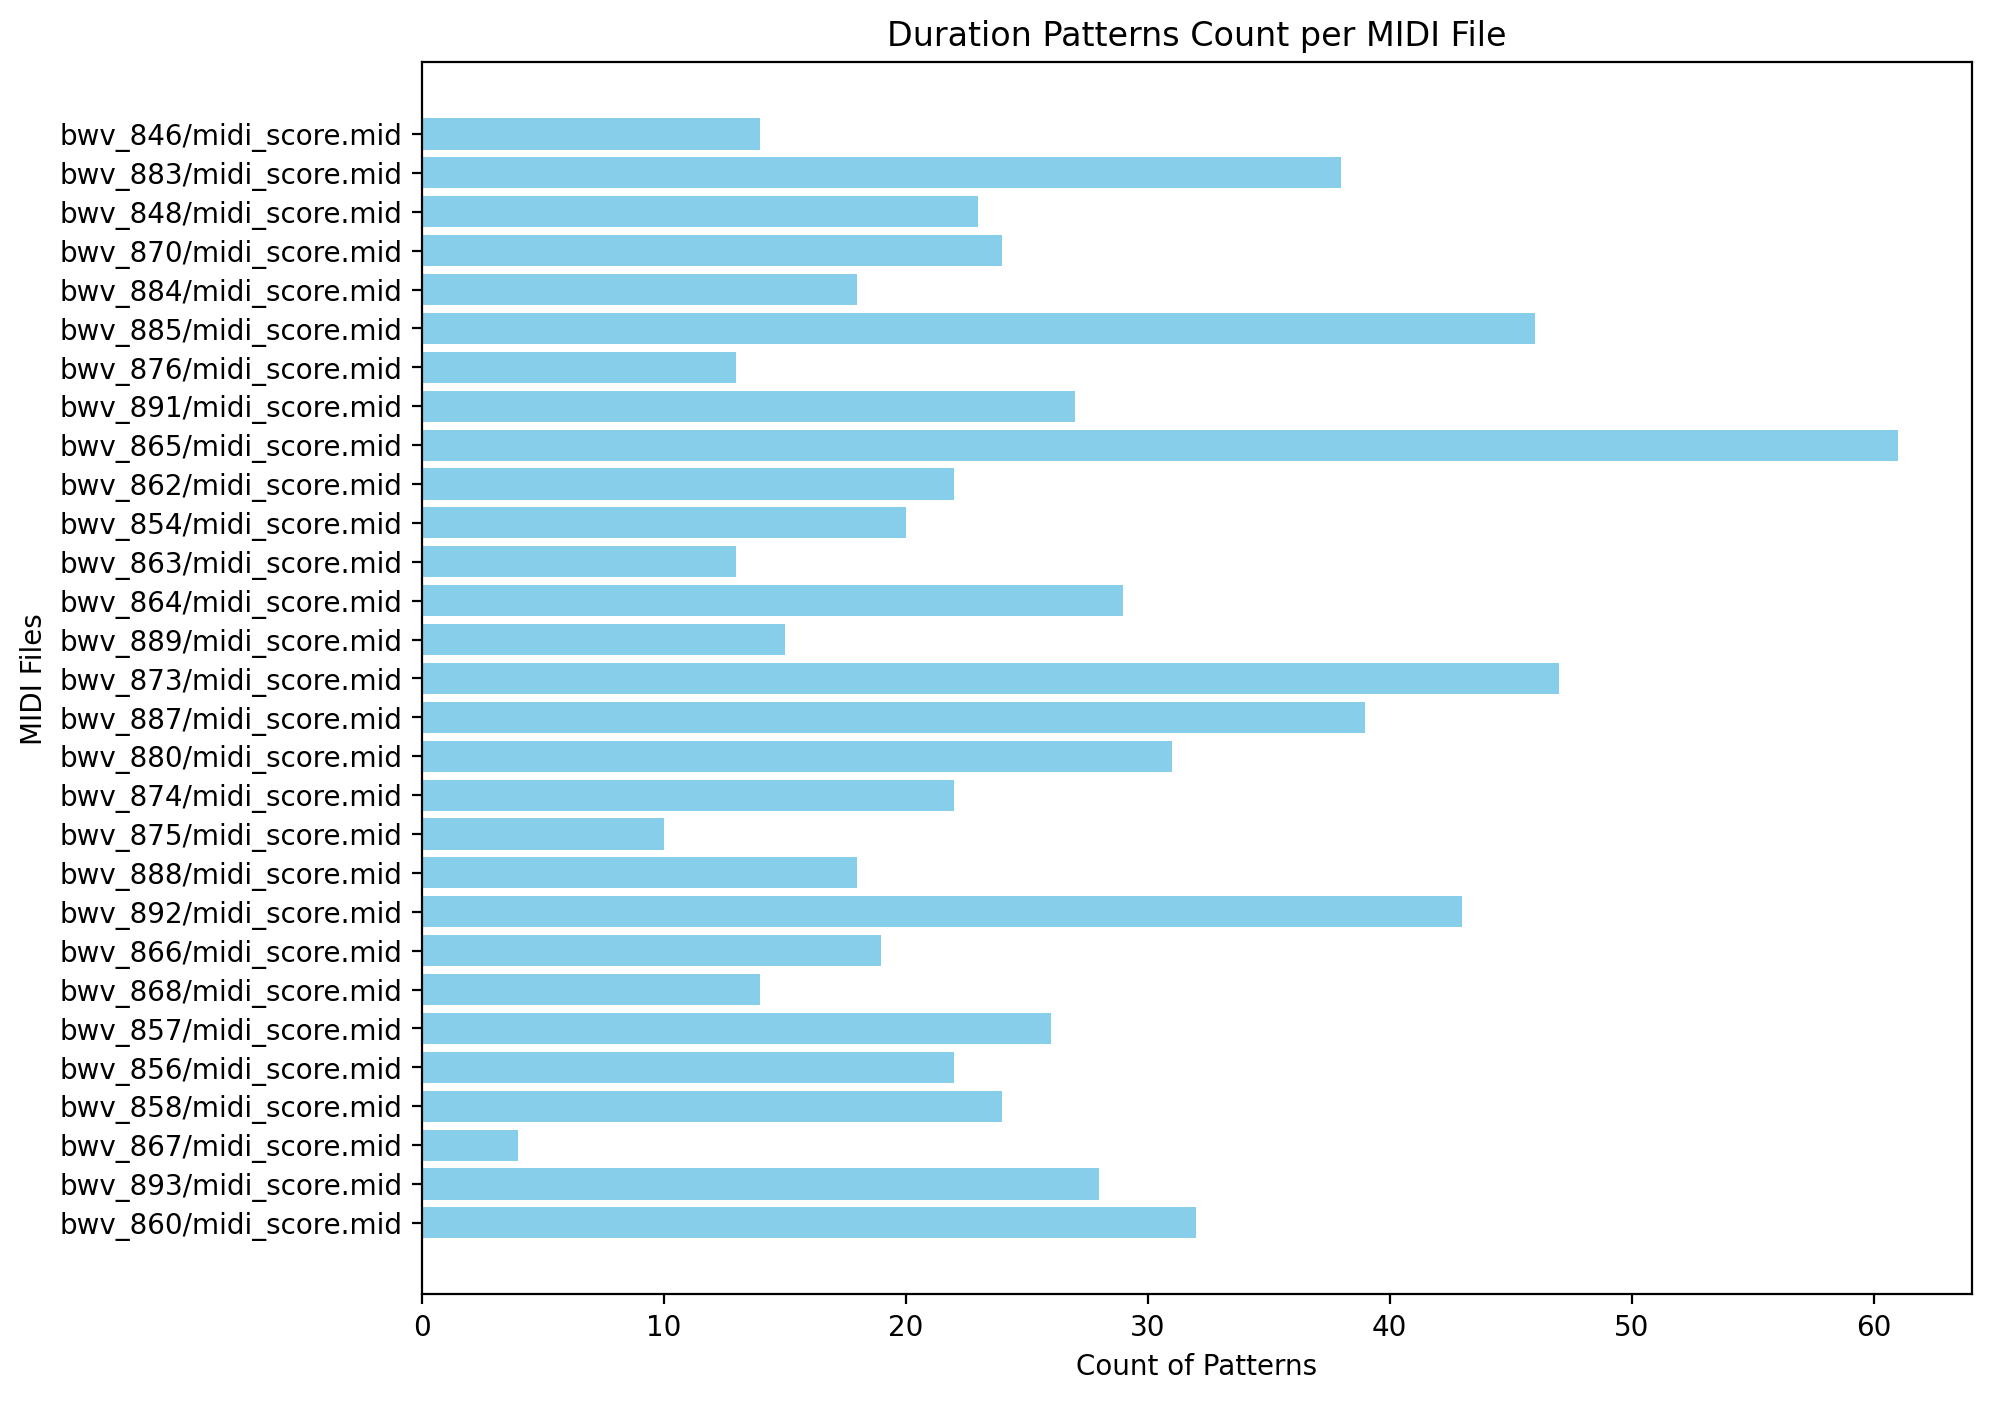

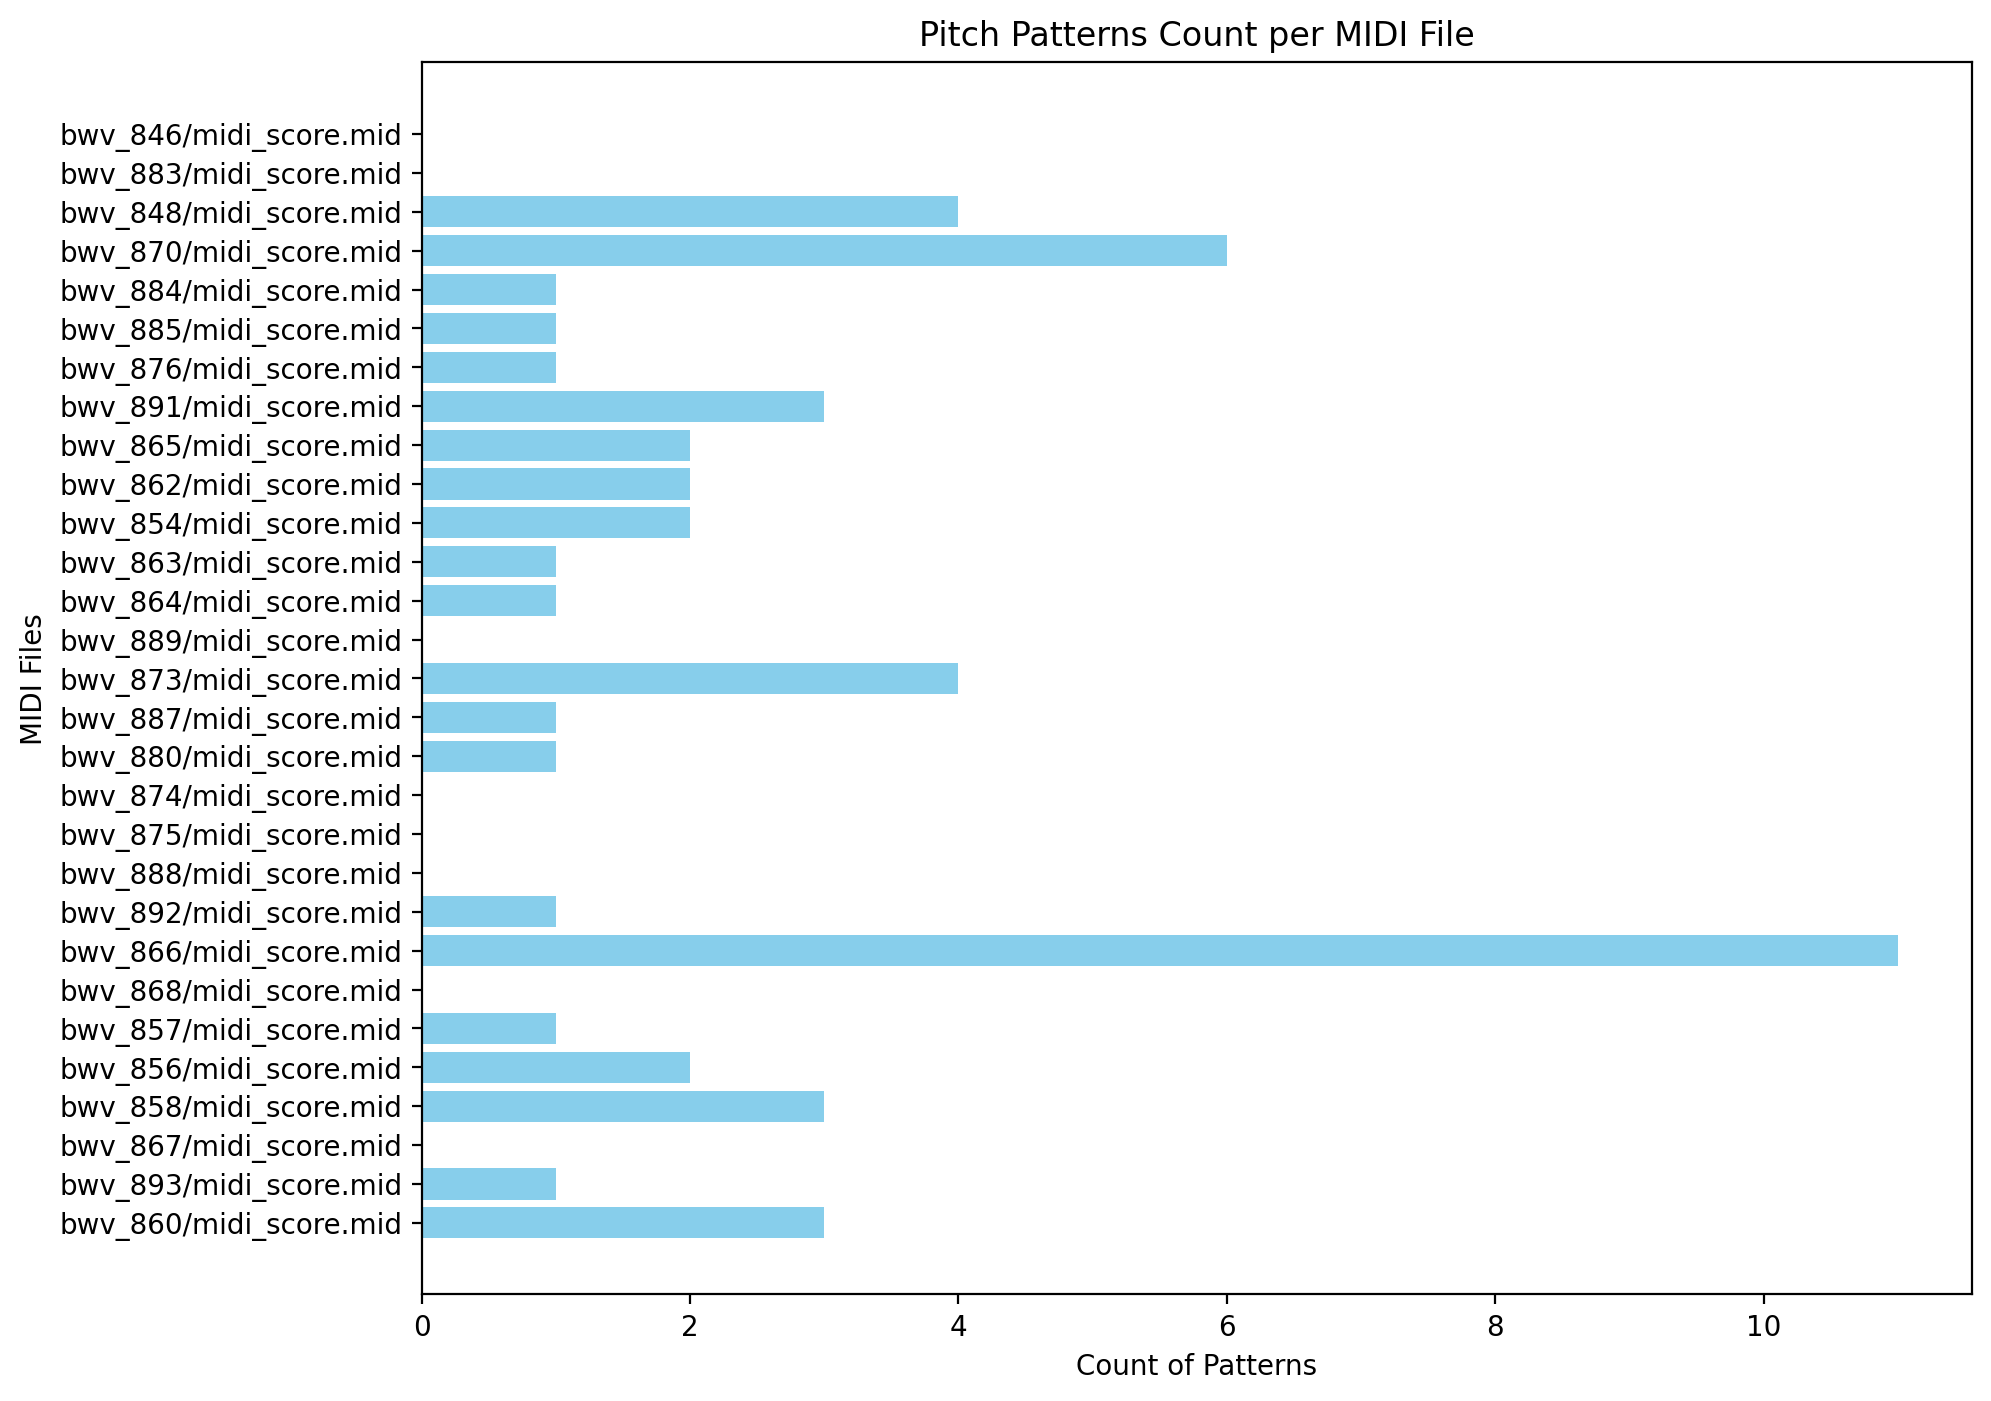

In [158]:
plot_pattern_counts(duration_pattern_counts, 'Duration Patterns Count per MIDI File')
plot_pattern_counts(pitch_pattern_counts, 'Pitch Patterns Count per MIDI File')


In [174]:
# Example usage
new_piece_path = '/content/drive/MyDrive/musicology a3/Fugue/bwv_860'  # Replace with the path to your folder
duration_pattern_counts, pitch_pattern_counts = process_folder(new_piece_path)

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


No more repeated patterns found at length 71. Exiting loop.
No more repeated patterns found at length 19. Exiting loop.
Processed /content/drive/MyDrive/musicology a3/Fugue/bwv_860/midi_score.mid:
Here are duration patterns
length is 23
Pattern(0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)  occurs 2 at onsets [(162.25, 162.5, 162.75, 163.0, 163.25, 163.5, 163.75, 164.0, 164.25, 164.5, 164.75, 165.0, 165.25, 165.5, 165.75, 166.0, 166.25, 166.5, 166.75, 167.0, 167.25, 167.5, 167.75), (171.25, 171.5, 171.75, 172.0, 172.25, 172.5, 172.75, 173.0, 173.25, 173.5, 173.75, 174.0, 174.25, 174.5, 174.75, 175.0, 175.25, 175.5, 175.75, 176.0, 176.25, 176.5, 176.75)]
length is 33
Pattern(0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)  occurs 2 at onsets [(156.5, 

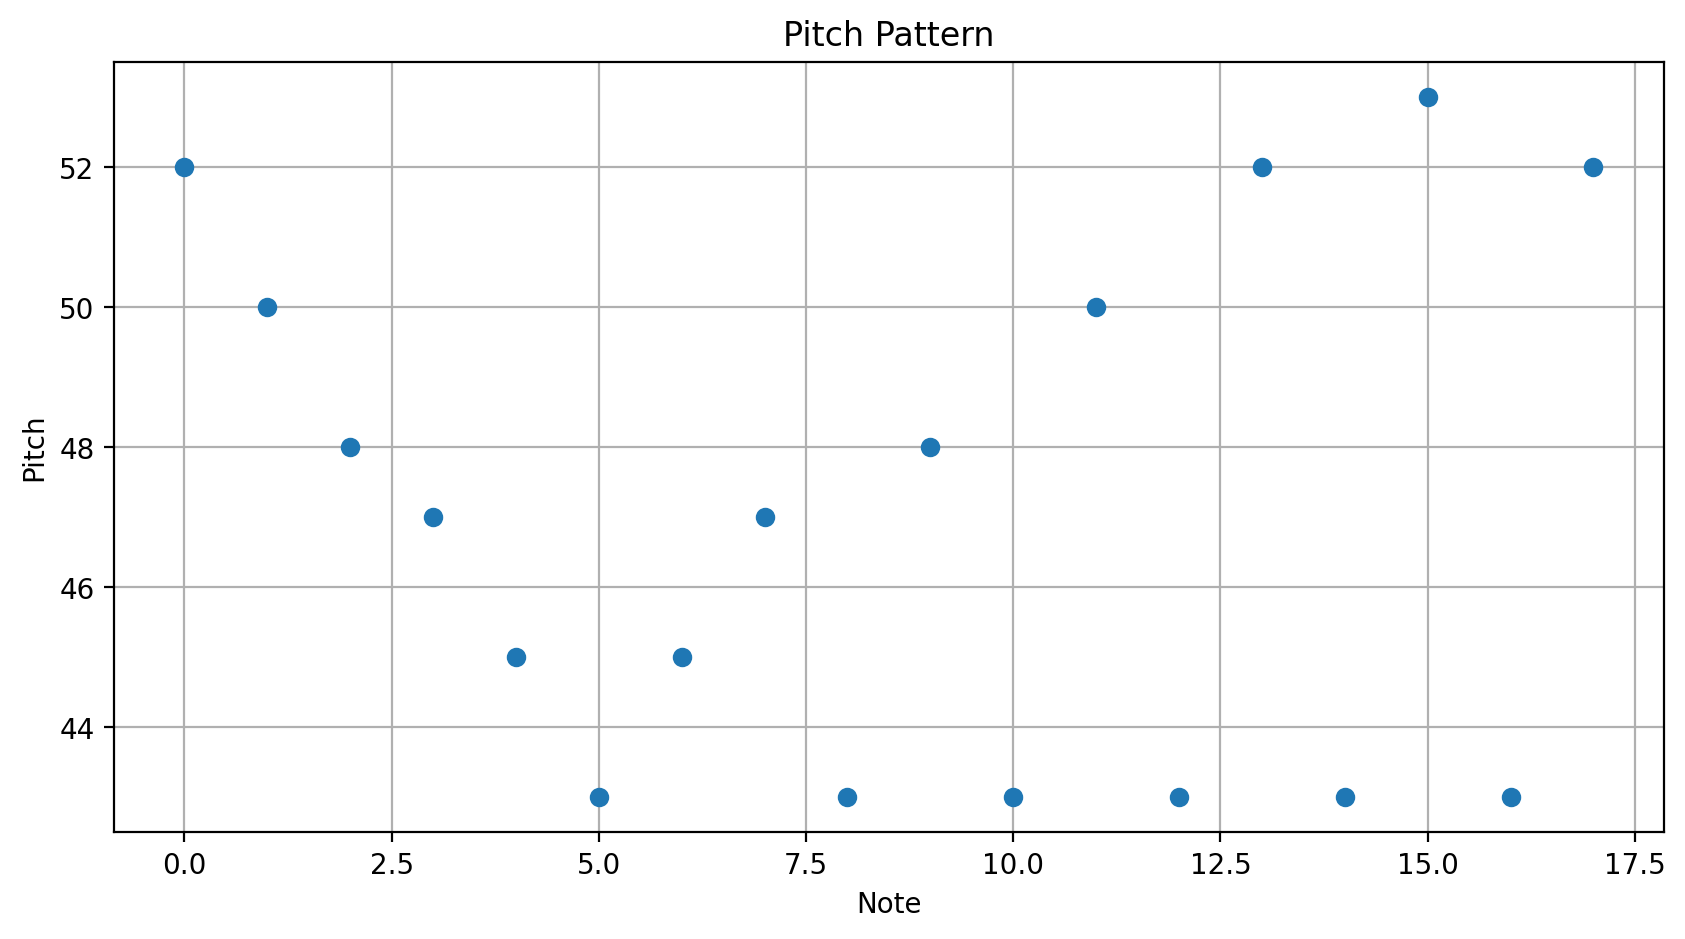

In [176]:
pattern =(52, 50, 48, 47, 45, 43, 45, 47, 43, 48, 43, 50, 43, 52, 43, 53, 43, 52)
plt.figure(figsize=(10, 5))
plt.plot(pattern, 'o', label='Pattern ' + '-'.join(map(str, pattern)))

plt.xlabel('Note')
plt.ylabel('Pitch')
plt.title('Pitch Pattern')
plt.grid(True)
plt.show()

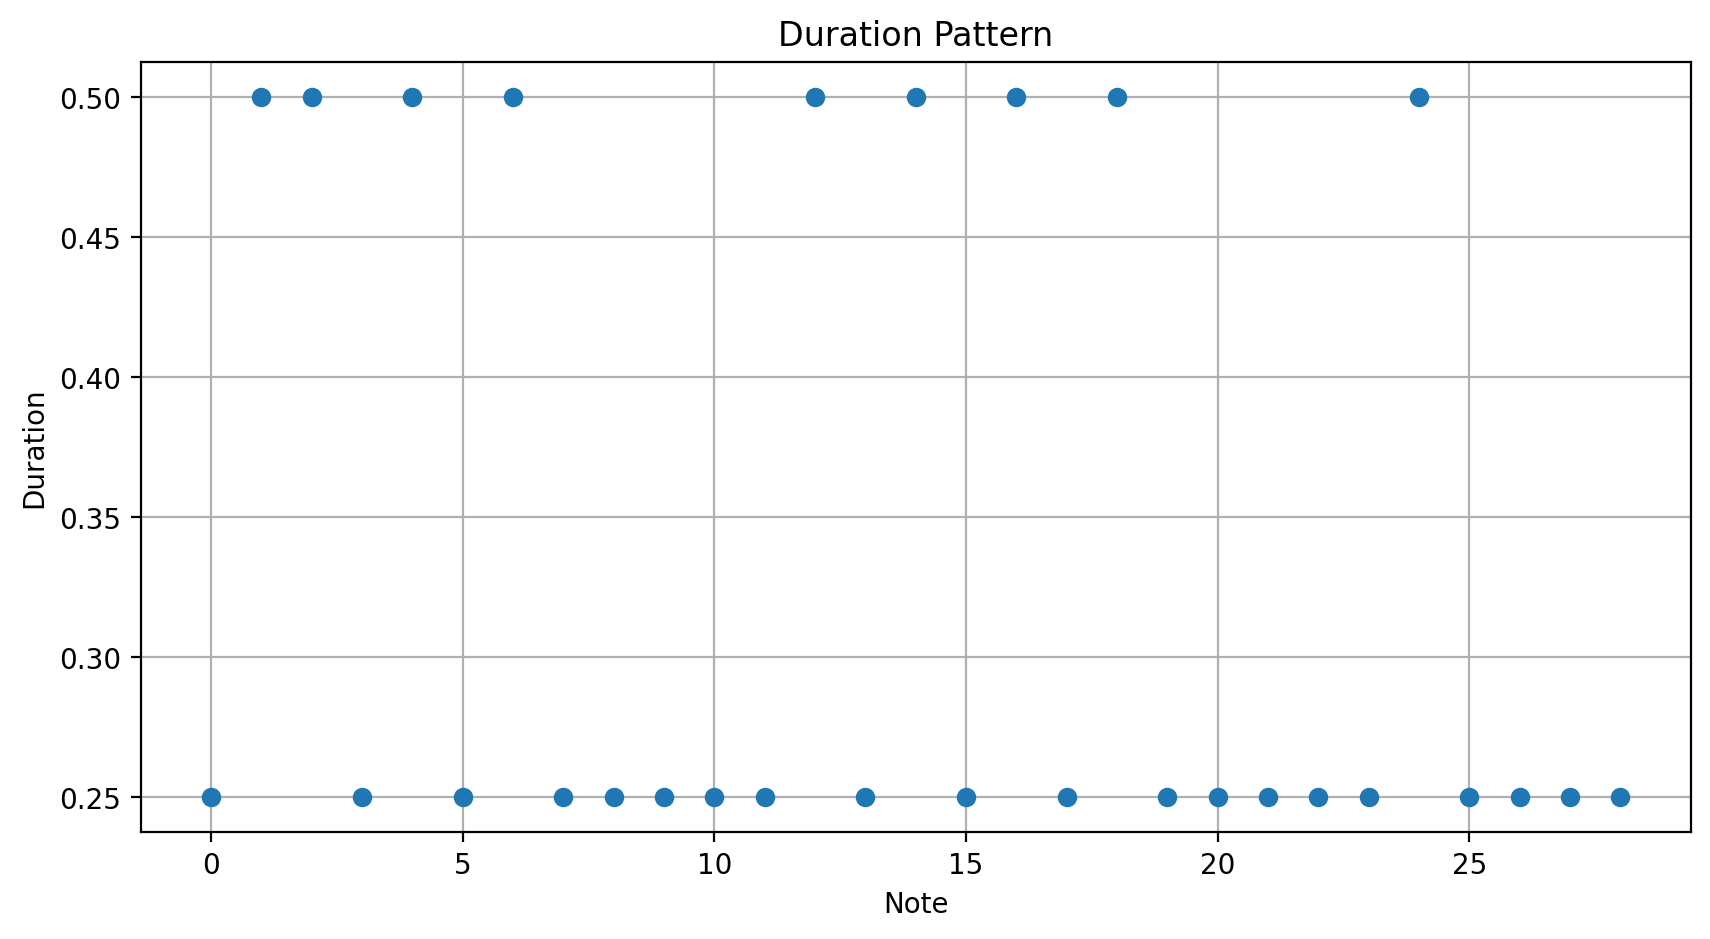

In [177]:
pattern =(0.25, 0.5, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25)
plt.figure(figsize=(10, 5))
plt.plot(pattern, 'o', label='Pattern ' + '-'.join(map(str, pattern)))

plt.xlabel('Note')
plt.ylabel('Duration')
plt.title('Duration Pattern')
plt.grid(True)
plt.show()